In [4]:
import data_mod as eurostat
import matplotlib.pyplot as plt
from kmodes.kprototypes import KPrototypes

# Testing clustering with only frequency 'Every day'
alc_income_freq = eurostat.AlcoholDataset(dataset_name='hlth_ehis_al1i', dataset_group='income', frequences= ['Every day']).get_dataset()
income_data = alc_income_freq[alc_income_freq['TIME_PERIOD'] == 2014].drop(['TIME_PERIOD'], axis=1)
income_data.head()

frequenc,age,geo,sex,quant_inc,Every day
0,75 years or over,Austria,Females,Fifth quintile,14.8
1,75 years or over,Austria,Females,First quintile,5.9
2,75 years or over,Austria,Females,Fourth quintile,7.7
3,75 years or over,Austria,Females,Second quintile,5.1
4,75 years or over,Austria,Females,Third quintile,5.4


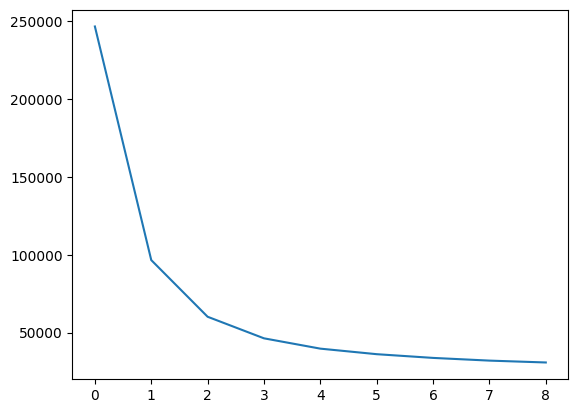

In [5]:
# Test optimal number of cluster with elbow method

cost = []
for num_clusters in list(range(1,10)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(income_data, categorical=[0,1,2,3])
    cost.append(kproto.cost_)

plt.plot(cost)

In [20]:
print(cost)
print(income_data.head())

[246560.92247365016, 96555.22743957421, 60172.67721977712, 46318.743939691696, 39695.15371944468, 36136.369596790966, 33746.03962570793, 32010.157305056568, 30812.400946384685]
frequenc               age      geo      sex        quant_inc  Every day
0         75 years or over  Austria  Females   Fifth quintile       14.8
1         75 years or over  Austria  Females   First quintile        5.9
2         75 years or over  Austria  Females  Fourth quintile        7.7
3         75 years or over  Austria  Females  Second quintile        5.1
4         75 years or over  Austria  Females   Third quintile        5.4


In [21]:
# Testing with optimal number of clusters

kproto = KPrototypes(n_clusters=3, init='Cao')
clusters = kproto.fit_predict(income_data, categorical=[0,1,2,3])

cluster_dict =[]
for c in clusters:
    cluster_dict.append(c)

income_data_with_clusters = income_data.copy()
income_data_with_clusters['clusters'] = cluster_dict

income_data_with_clusters.head()



frequenc,age,geo,sex,quant_inc,Every day,clusters
0,75 years or over,Austria,Females,Fifth quintile,14.8,2
1,75 years or over,Austria,Females,First quintile,5.9,0
2,75 years or over,Austria,Females,Fourth quintile,7.7,0
3,75 years or over,Austria,Females,Second quintile,5.1,0
4,75 years or over,Austria,Females,Third quintile,5.4,0


In [17]:
income_data_clust_0 = income_data_with_clusters[income_data_with_clusters['clusters'] == 0 ]
income_data_clust_1 = income_data_with_clusters[income_data_with_clusters['clusters'] == 1 ]
income_data_clust_2 = income_data_with_clusters[income_data_with_clusters['clusters'] == 2 ]

income_data_clust_0.head(10)

frequenc,age,geo,sex,quant_inc,Every day,clusters
12,75 years or over,Austria,Males,Fourth quintile,32.0,0
20,75 years or over,Belgium,Females,Fifth quintile,30.4,0
30,75 years or over,Belgium,Males,Fifth quintile,38.4,0
32,75 years or over,Belgium,Males,Fourth quintile,32.6,0
70,75 years or over,Croatia,Males,Fifth quintile,50.2,0
73,75 years or over,Croatia,Males,Second quintile,29.4,0
74,75 years or over,Croatia,Males,Third quintile,33.1,0
131,75 years or over,Denmark,Males,First quintile,33.6,0
133,75 years or over,Denmark,Males,Second quintile,30.0,0
134,75 years or over,Denmark,Males,Third quintile,49.3,0


In [25]:
import seaborn as sns

sns.boxplot(x='clusters', y='Every day', data=income_data_with_clusters)
plt.title("Distribution of 'Every day' Drinking by Cluster")
plt.show()

ModuleNotFoundError: No module named 'seaborn'